# **02 - Análisis y Exploración de datos con Pandas**

## **La librería Pandas**

Es una librería del lenguaje Python cuyo principal objetivo es manipular fácilmente grandes conjuntos de datos, y realizar operaciones y estadísticas sobre los mismos. Se lleva muy bien con las librerías *numpy y pyplot*. Acá, [la documentación oficial](https://pandas.pydata.org/)



### Importación de librería
Tal cual vimos con las otras librerías, Pandas también tiene un pseudónimo y es **pd**. Así llamaremos a la librería cada vez que necesitemos utilizar alguna de sus funcionalidades

In [0]:
import pandas as pd

Podemos ver información relevante de una librería, escribiendo su nombre seguido de un símbolo de pregunta.

*Tip importante*: Esto funciona también para conocer qué realiza una función en particular

In [0]:
pd?

## **Lectura de datasets**
Un *dataset* es un conjunto de datos organizados en una cierta disposición. Existen muchos formatos de datasets. A lo largo del módulo de Ciencia de Datos, trabajaremos con datasets que provienen de archivos .CSV, archivos JSON, .txt, entre otros.

La librería Pandas procesa de forma rápida el contenido de los datasets (cualquiera sea el caso) y lo almacena en un **DataFrame**. Un DataFrame es una estructura bidimensional lógica (existe únicamente en memoria), que contiene datos estructurados y, a diferencia de un dataset, cada columna o campo tiene su nombre correspondiente que identifica los valores de cada registro o fila. 

### Archivos .CSV
Los archivos *CSV* son fuentes de información generalmente separadas por comas, o por algún caracter en particular que delimita el final de cada dato. 


Como primer ejemplo de lectura de datasets, procederemos a importar un archivo .CSV. Vamos a obtener los datos de Ingresos y Egresos de personas al país en el 4° trimestre del año 2019, cuyo link de acceso al dataset figura en este [sitio web](https://datos.gob.ar/dataset/interior-ingresos-egresos-personas-al-pais-residencias-otorgadas/archivo/interior_effbfa04-fec7-43af-ab9e-ad5347f5e767)  

El enlace que vamos a utilizar se obtiene haciendo click derecho en el botón "*Descargar*" y eligiendo la opción "copiar la dirección del vínculo".

Para importar los datos, guardamos la URL destino en una variable, y se la mandamos por parámetro a la función **read_csv** que provee Pandas


In [0]:
url = "https://datos.mininterior.gob.ar/dataset/dd032084-b7eb-4317-9151-05fc850c1654/resource/effbfa04-fec7-43af-ab9e-ad5347f5e767/download/movimientos-migratorios--4-trimestre---ano-2019.csv"
df_ing_egr = pd.read_csv(url, sep=',', encoding = "ISO-8859-1")

En este caso, aparte de mandarle por parámetro la URL, vemos que se definió el caracter separador (una coma), y además se utilizó cierta codificación particular (ISO-8859-1). Estas dos configuraciones de lectura no son siempre necesarias, depende exclusivamente de cómo estén guardados los datos a importar.

Lo que hicimos fue guardar en una variable df_ing_egr , el resultado de la lectura del dataset. Posteriormente, invocaremos a df_ing_egr en una nueva celda de código para **visualizar sus primeras y últimas 5 filas**.

In [4]:
df_ing_egr

,PASO_CRUCE,CANTIDAD
0,AERO EZEIZA,2949664
1,PTE. INT. TANCREDO NEVES,2765577
2,PTE. SAN ROQUE GONZALEZ DE SAN,2202025
3,SALVADOR MAZZA - YACUIBA,923252
4,PASO DE LOS LIBRES,880025
...,...,...
95,PASO SICO,2236
96,AERO PUBLICO DE USHUAIA,2127
97,PUERTO LIBERTAD,2083
98,PUERTO OASIS,2025


Es muy importante separar la lectura del dataset en una celda diferente a las que utilizamos para visualizarlo o procesar su contenido. De lo contrario, estaremos cargando nuevamente la fuente de datos cuando tal vez no sea necesario. 

### JSON
Así como podemos leer un archivo CSV (desde una URL, o bien cargarlo a Google Colaboratory si lo tenemos en nuestra PC) podemos leer un JSON. Los archivos JSON tienen una estructura particular, en la cual tenemos objetos con propiedades, e incluso podemos contar con arrays que incluyan objetos dentro. 

La forma de importar un JSON es muy similar a la carga de un archivo CSV, solamente cambia el método de Pandas a invocar. 

In [5]:
url = "https://raw.githubusercontent.com/corysimmons/colors.json/master/colors.json"
df_colores = pd.read_json(url)
df_colores

,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,darkturquoise,darkviolet,...,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,transparent,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen,rebeccapurple
0,240,250,0,127,240,245,255,0,255,0,138,165,222,95,127,210,255,100,255,220,0,0,0,184,169,0,169,189,139,85,255,153,139,233,143,72,47,47,0,148,...,152,175,219,255,255,205,255,221,176,128,255,188,65,139,250,244,46,255,160,192,135,106,112,112,255,0,70,210,0,216,255,0,64,238,245,255,245,255,154,102
1,248,235,255,255,255,245,228,0,235,0,43,42,184,158,255,105,127,149,248,20,255,0,139,134,169,100,169,183,0,107,140,50,0,150,188,61,79,79,206,0,...,251,238,112,239,218,133,192,160,224,0,0,143,105,69,128,164,139,245,82,192,206,90,128,128,250,255,130,180,128,191,99,0,224,130,222,255,245,255,205,51
2,255,215,255,212,255,220,196,0,205,255,226,42,135,160,0,30,80,237,220,60,255,139,139,11,169,0,169,107,139,47,0,204,0,122,143,139,79,79,209,211,...,152,238,147,213,185,63,203,221,230,128,0,143,225,19,114,96,87,238,45,192,235,205,144,144,250,127,180,140,128,216,71,0,208,238,179,255,245,0,50,153
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


A veces puede pasar que el DataFrame se genere de una manera que no nos sirva. Por ejemplo en este caso, la carga de este JSON ejemplo de colores, nos genera una columna para cada color, y como fila, cada uno de los valores para R G B. Claramente, debería ser al revés: un registro para cada color, y como columnas, los valores de rojo, verde y azul correspondientes. 

Podemos usar el método **transpose()** para convertir filas en columnas, y viceversa. 

In [6]:
df_colores_final = df_colores.transpose()
df_colores_final

,0,1,2,3
aliceblue,240,248,255,1
antiquewhite,250,235,215,1
aqua,0,255,255,1
aquamarine,127,255,212,1
azure,240,255,255,1
...,...,...,...,...
white,255,255,255,1
whitesmoke,245,245,245,1
yellow,255,255,0,1
yellowgreen,154,205,50,1


## **Características y Métodos generales de un DataFrame**

### Información general del conjunto de datos
Invocando al método **info**, podemos ver fácilmente cómo está compuesto el DataFrame

In [7]:
df_ing_egr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PASO_CRUCE  100 non-null    object
 1   CANTIDAD    100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


En este caso podemos observar que el DataFrame tiene 2 columnas, una para conocer el Paso o Cruce, y en la otra (de tipo int64), conocemos la cantidad de personas que cruzaron por esa vía.

### **Ejercicio**

¿Qué devuelve el atributo **columns**?

Probalo en las siguiente celda de código!

Respuesta: 

### El método describe()

describe() nos proporcionará información general importante de un DataFrame respecto a los valores que contiene. 

**Funciona únicamente sobre columnas que contienen datos numéricos.**

Previo a esto, podemos utilizar una funcionalidad de pandas llamada set_option, para setear los resultados que muestra el describe con solo dos decimales.

In [8]:
pd.set_option('float_format', '{:,.2f}'.format)
df_ing_egr.describe()

,CANTIDAD
count,100.00
mean,"169,644.89"
std,"469,530.00"
min,"1,970.00"
25%,"6,321.00"
50%,"30,776.00"
75%,"87,331.00"
max,"2,949,664.00"


### Longitud (en cantidad de registros) de un DataFrame

Podemos visualizar la cantidad de registros que tiene un DataFrame, con la función **len**

In [9]:
print("Cantidad de registros en el DataFrame: ",len(df_ing_egr))

Cantidad de registros en el DataFrame:  100


### Acceso a una o varias posiciones de un DataFrame

Como con todo array (o vector dinámico), en un DataFrame es posible acceder a una posición puntual con el método **iloc**, recibiendo entre doble corchete, el valor del índice del registro deseado.

In [10]:
df_ing_egr.iloc[[50]]

,PASO_CRUCE,CANTIDAD
50,PUERTO IGUAZU - TRES FRONTERAS,28555


Como variación de funcionamiento de iloc, podemos pasarle entre solo un par de corchetes, un conjunto de registros en específico a obtener

In [11]:
df_ing_egr.iloc[6:10] #Observá que el máximo no está incluido en el resultado

,PASO_CRUCE,CANTIDAD
6,PUERTO CHALANAS,543288
7,PTE. SAN IGNACIO DE LOYOLA,490759
8,GUALEGUAYCHU - FRAY BENTOS,421207
9,PTE. INT. SALTO GRANDE,400321


## **Selecciones**
Al igual que como trabajamos hace unos meses sobre una base de datos SQL, cuando leemos datos desde un DataFrame podemos realizar selecciones de registros con ciertas propiedadaes, filtros y restricciones. 

### Visualización general de datos del Dataframe

Podemos obtener registros específicos de un dataframe de varias maneras.

Con **head(n)** y **tail(n)** podemos ver los **n** primeros y últimos (respectivamente) registros del dataframe

Si dejamos vacío el valor de n, los métodos nos mostrarán **5** valores

In [12]:
df_ing_egr.head()

,PASO_CRUCE,CANTIDAD
0,AERO EZEIZA,2949664
1,PTE. INT. TANCREDO NEVES,2765577
2,PTE. SAN ROQUE GONZALEZ DE SAN,2202025
3,SALVADOR MAZZA - YACUIBA,923252
4,PASO DE LOS LIBRES,880025


In [13]:
df_ing_egr.head(2)

,PASO_CRUCE,CANTIDAD
0,AERO EZEIZA,2949664
1,PTE. INT. TANCREDO NEVES,2765577


In [14]:
df_ing_egr.tail(10)

,PASO_CRUCE,CANTIDAD
90,PASO AGUA NEGRA,2776
91,PUERTO OLIVOS,2682
92,PUERTO YAHAPE,2494
93,PUERTO ISLA MARTIN GARCIA,2354
94,ING. PALLAVICINI - IBAÑEZ,2248
95,PASO SICO,2236
96,AERO PUBLICO DE USHUAIA,2127
97,PUERTO LIBERTAD,2083
98,PUERTO OASIS,2025
99,PUERTO SANTA ANA,1970


En caso de necesitarlo, podemos obtener un array con todos los valores de una sola columna, invocando a la columna como atributo del DataFrame

In [15]:
paso_cruce = df_ing_egr.PASO_CRUCE
paso_cruce

0                        AERO EZEIZA
1           PTE. INT. TANCREDO NEVES
2     PTE. SAN ROQUE GONZALEZ DE SAN
3           SALVADOR MAZZA - YACUIBA
4                 PASO DE LOS LIBRES
                   ...              
95                         PASO SICO
96           AERO PUBLICO DE USHUAIA
97                   PUERTO LIBERTAD
98                      PUERTO OASIS
99                  PUERTO SANTA ANA
Name: PASO_CRUCE, Length: 100, dtype: object

### Ordenamiento
Pandas provee el método **sort_values()**, que me permite ordenar los resultados de una "consulta" por los criterios que querramos.

Pueden ser varios los parámetros a enviar, en principio utilizaremos como primer parámetro las columnas a ordenar, y como segundo, si queremos que sea ascendente (ascending=True) o descendente (ascending=False)

In [16]:
cruces_ordenados = df_ing_egr.sort_values("CANTIDAD",ascending=False)
cruces_ordenados.head()

,PASO_CRUCE,CANTIDAD
0,AERO EZEIZA,2949664
1,PTE. INT. TANCREDO NEVES,2765577
2,PTE. SAN ROQUE GONZALEZ DE SAN,2202025
3,SALVADOR MAZZA - YACUIBA,923252
4,PASO DE LOS LIBRES,880025


sort_values **devuelve un nuevo DataFrame** que guardamos en *cruces_ordenados*, y sobre este último invocamos el método **head()** para ver los 5 cruces con más afluencia de gente.

## Graficando datos con Pandas

Podemos hacer un gráfico de barras invocando a **plot.bar()**
Este método lo provee Pandas. No es necesario invocar a pyplot. 

En todos los próximos gráficos utilizaremos primeros_veinte, un DataFrame que solo guarda los primeros 20 cruces o pasos más concurridos

In [0]:
primeros_veinte = cruces_ordenados.head(20)

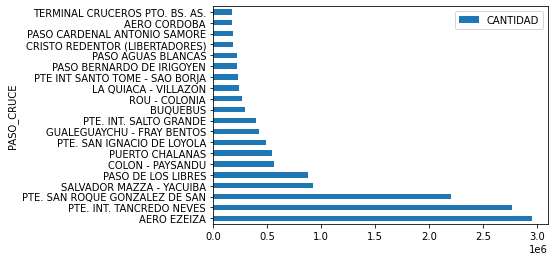

In [18]:
primeros_veinte.plot.barh("PASO_CRUCE","CANTIDAD");

Se genera correctamente el gráfico pero podemos notar algunas cosas :


*   El tamaño del gráfico es relativamente pequeño 
*   Los pasos o cruces más concurridos aparecen abajo de todo


Procedemos entonces a guardar el gráfico de barras en una variable llamada *grafico*. Y luego, invertimos el eje Y con **invert_yaxis()**, para que aparezcan arriba de todo los cruces o pasos más concurridos.

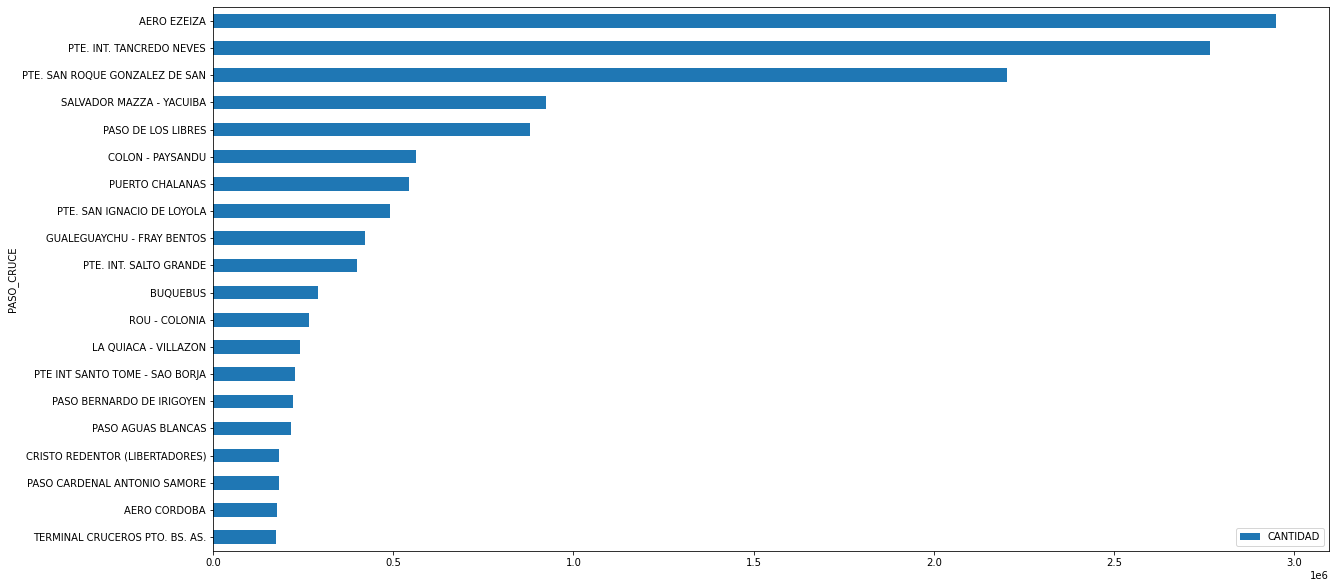

In [19]:
grafico = primeros_veinte.plot.barh("PASO_CRUCE","CANTIDAD",figsize=(20,10));
grafico.invert_yaxis()

Tal vez te diste cuenta (tal vez no) que agregamos un parámetro más a la generación del gráfico que es figsize. Ese parámetro permite modificar el tamaño del gráfico. El primer valor corresponde al ancho, y el segundo al alto. 

## Graficando datos con Pyplot

In [0]:
import matplotlib.pyplot as plt


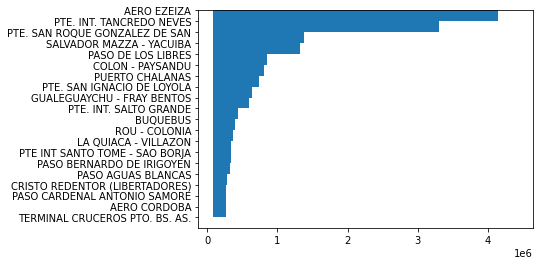

In [21]:
plt.bar(x=primeros_veinte.CANTIDAD,width=primeros_veinte.CANTIDAD, height=primeros_veinte.PASO_CRUCE)
plt.gca().invert_yaxis()

## Graficando datos con Seaborn
Seaborn es una librería específica para trabajar con Gráficos, y resulta ser más estética que las soluciones anteriores. 

De hecho, una vez que importemos seaborn en nuestro notebook, los gráficos de Pandas también se verán afectados!!

### Importación de librería

In [22]:
import seaborn as sns;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Seteo de propiedades para los gráficos
En esta sección, definiremos el estilo de gráfico a utilizar, y el tamaño que tendrá en pantalla. 

In [0]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Generación del gráfico
Por último, generamos el gráfico con Seaborn. Las diferencias en la imagen hablan por sí solas

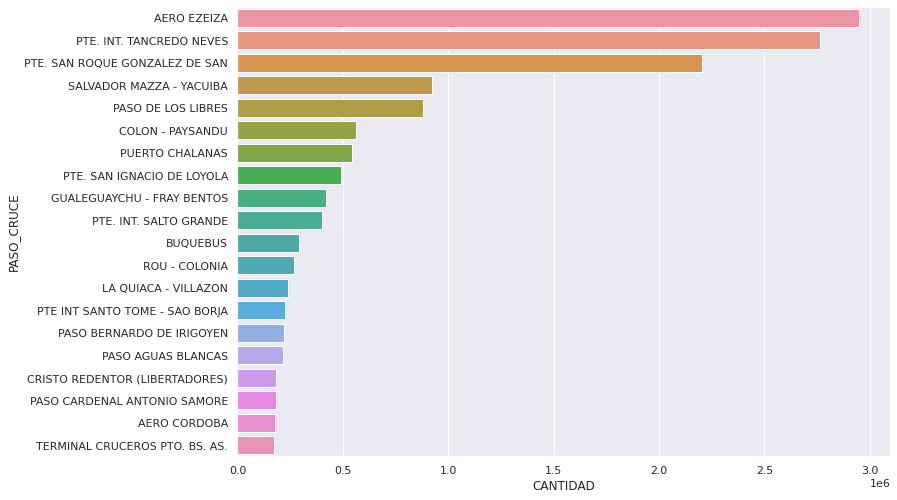

In [24]:
grafico = sns.barplot(x=primeros_veinte.CANTIDAD, y=primeros_veinte.PASO_CRUCE, data=primeros_veinte)